# project Text  extract rom image
in this project we will be working on extracting text from images


In [ ]:
# import the libraries
import requests

In [ ]:
# Download tesseract-ocr file
r = requests.get("https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata", stream=True)

# Writing data to file to avoid path isuues
with open("/usr/share/tesseract-ocr/4.00/ind.traineddata", "wb") as file:
    for block in r.iter_content(chunk_size=128):
        file.write(block)


In [ ]:
# Installing libraries required fpr optical character recognition
! apt install tesseract-ocr libtesseract-dev libmagickwand-dev

# Import Iphyton to clear output which is not important
from IPython.display import HTML, clear_output
clear_output()

In [ ]:
# Installing pytesseract and opencv
! pip install pytesseract want opencv-python
clear_output()

In [ ]:
# import librarries
from PIL import Image
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re


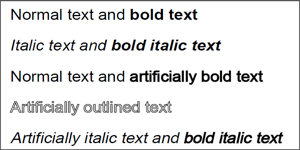

In [ ]:
# Reading image form url
image = Image.open(requests.get('https://i.stack.imgur.com/pbIdS.png', stream=True).raw)
image = image.resize((300,150))
image.save('sample.png')
image

In [ ]:
# # reading Image from Url
# from io import BytesIO
# from PIL import Image


# image = Image.open("/content/drive/MyDrive/Text_extractor_project/Gemini_Generated_Image_u98bs1u98bs1u98b.png")
# image = image.resize((300, 150))
# image.save('sample.png')
# image

# Now we will extract Text from Image


In [ ]:
# Simply extracting text from Image
custom_config = r'-l eng --oem 3 --psm 6'
text = pytesseract.image_to_string(Image.open('/content/sample.png'), config=custom_config)
print(text)


Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text



In [ ]:
# Extracting text from image and removing irrelevant symbols from characters
try:

  text = pytesseract.image_to_string(image, lang ="eng")
  characters_to_remove = "!()@—*“>+-/,'|£#%$&^_~"
  new_string = text
  for character in characters_to_remove:
    new_string = new_string.replace(character, "")
  print(new_string)
except IOError as e:
  print("Error (%s)." % e)

 

 

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text

 

 



## We use this method when we have compexe image

In [ ]:
image = cv2.imread('/content/sample.png')

### Convert image into gray scal


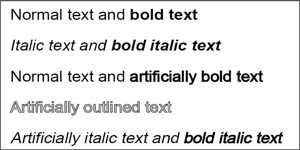

In [ ]:
# convert the image into grayscal
def get_grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = get_grayscale(image)
Image.fromarray(gray)

### Remove noise

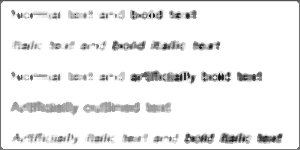

In [ ]:
# remove noise
def remove_noise(image):
  return cv2.medianBlur(image, 5)
noise = remove_noise(gray)
Image.fromarray(noise)

## calculate the threshol

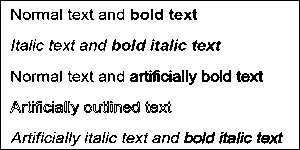

In [ ]:
# thresholding
def thresholding(image):
  return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = thresholding(gray)
Image.fromarray(thresh)

### Use Erosion to clean image better

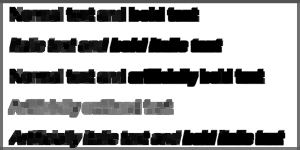

In [ ]:
# erosion
def erode(image):
  kernel = np.ones((5, 5), np.uint8)
  return cv2.erode(image, kernel, iterations=1)
eroded = erode(gray)
Image.fromarray(eroded)

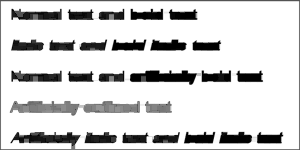

In [ ]:
# Morphology
def morphology(image):
  kernel = np.ones((5, 5), np.uint8)
  return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
morph= morphology(gray)
Image.fromarray(morph)


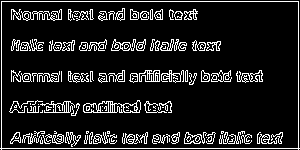

In [ ]:
# canny detection
def canny(image):
  return cv2.Canny(image, 100, 200)
canny = canny(gray)
Image.fromarray(canny)

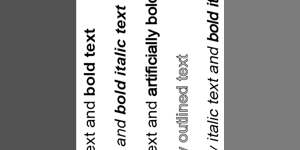

In [ ]:
# skew correction
def deskew(image):
  coords = np.column_stack(np.where(image > 0))
  angle = cv2.minAreaRect(coords)[-1]
  if angle < -45:
    angle = -(90 + angle)
  (h, w) = image.shape[:2]
  center = (w // 2, h // 2)
  M = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
  return rotated
rotated = deskew(gray)
Image.fromarray(rotated)

In [ ]:
# template matching
def match_template(image, template):
  return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
matsh = match_template(gray, gray)
matsh

array([[1.]], dtype=float32)

### we will separate every character in text by creating a rectangle around it

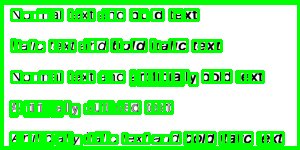

In [ ]:
# drawing rectangle around text
img = cv2.imread('/content/sample.png')
h, w, c = image.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
  b = b.split(' ')
  img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
Image.fromarray(img)


### Conclusion
In this project I work in a project that extract text  from image